<a href="https://colab.research.google.com/github/ritwik007788/Machine-Learning-Algorithm/blob/main/Classification_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

import sklearn.metrics as metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split


from sklearn.model_selection import cross_val_score

In [2]:
data = pd.read_csv('fetal_health.csv')
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


Exploratory Data Analysis

In [3]:
data.dtypes

baseline value                                            float64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                           float64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability    float64
mean_value_of_long_term_variability                       float64
histogram_width                                           float64
histogram_min                                             float64
histogram_max                                             float64
histogram_number_of_peaks                                 float64
histogram_

In [4]:
data.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [5]:
data.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,8.187629,70.445908,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,5.628247,38.955693,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,0.000000,3.000000,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,4.600000,37.000000,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,7.400000,67.500000,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,10.800000,100.000000,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,50.700000,180.000000,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [7]:
fe_h_count = data.fetal_health.value_counts()
fe_h_count

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

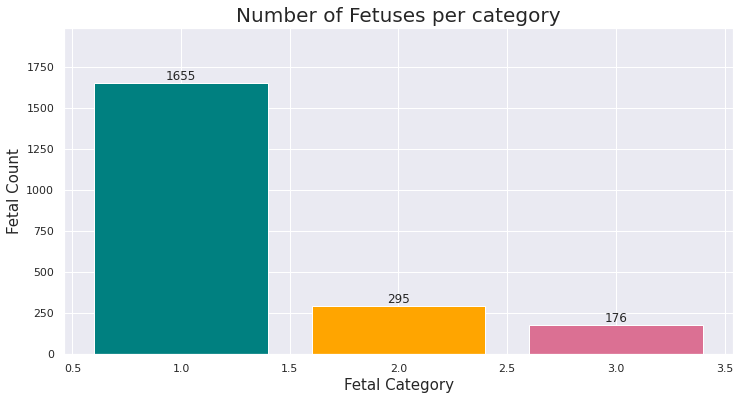

In [8]:
x = fe_h_count.index
y = fe_h_count.values
color=["teal","orange","palevioletred"]
sns.set(font_scale=1)
plt.figure(figsize=(12,6))
plt.bar(x=x, height=y, color=color)
plt.title("Number of Fetuses per category", fontsize=20)
plt.xlabel("Fetal Category", fontsize=15)
plt.ylabel("Fetal Count", fontsize=15)

for i in range(len(y)):
    plt.annotate(str(y[i]), xy=(x[i],y[i]), ha='center', va='bottom')
    
plt.margins(y=0.2)

In [9]:
x = data.drop('fetal_health', axis=1)
y = data['fetal_health']

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
X = scaler.fit_transform(x)

#showing data
print('x \n' , X[:10])
print('y \n' , y[:10])

x 
 [[0.25925926 0.         0.         0.         0.         0.
  0.         0.81333333 0.04411765 0.47252747 0.04733728 0.34463277
  0.11009174 0.03448276 0.11111111 0.         0.47244094 0.58715596
  0.40366972 0.27137546 1.        ]
 [0.48148148 0.31578947 0.         0.4        0.2        0.
  0.         0.06666667 0.27941176 0.         0.20512821 0.71751412
  0.16513761 0.65517241 0.33333333 0.1        0.63779528 0.57798165
  0.57798165 0.04460967 0.5       ]
 [0.5        0.15789474 0.         0.53333333 0.2        0.
  0.         0.05333333 0.27941176 0.         0.2642998  0.71751412
  0.16513761 0.65517241 0.27777778 0.1        0.63779528 0.56880734
  0.55963303 0.04832714 0.5       ]
 [0.51851852 0.15789474 0.         0.53333333 0.2        0.
  0.         0.05333333 0.32352941 0.         0.45364892 0.6440678
  0.02752294 0.4137931  0.61111111 0.         0.60629921 0.55963303
  0.55045872 0.04832714 1.        ]
 [0.48148148 0.36842105 0.         0.53333333 0.         0.
  0.     

Correlation

In [11]:
corr_matrix=data.corr()
corr_matrix['fetal_health'].sort_values(ascending=False)

fetal_health                                              1.000000
prolongued_decelerations                                  0.484859
abnormal_short_term_variability                           0.471191
percentage_of_time_with_abnormal_long_term_variability    0.426146
histogram_variance                                        0.206630
baseline value                                            0.148151
severe_decelerations                                      0.131934
fetal_movement                                            0.088010
histogram_min                                             0.063175
light_decelerations                                       0.058870
histogram_number_of_zeroes                               -0.016682
histogram_number_of_peaks                                -0.023666
histogram_max                                            -0.045265
histogram_width                                          -0.068789
mean_value_of_short_term_variability                     -0.10

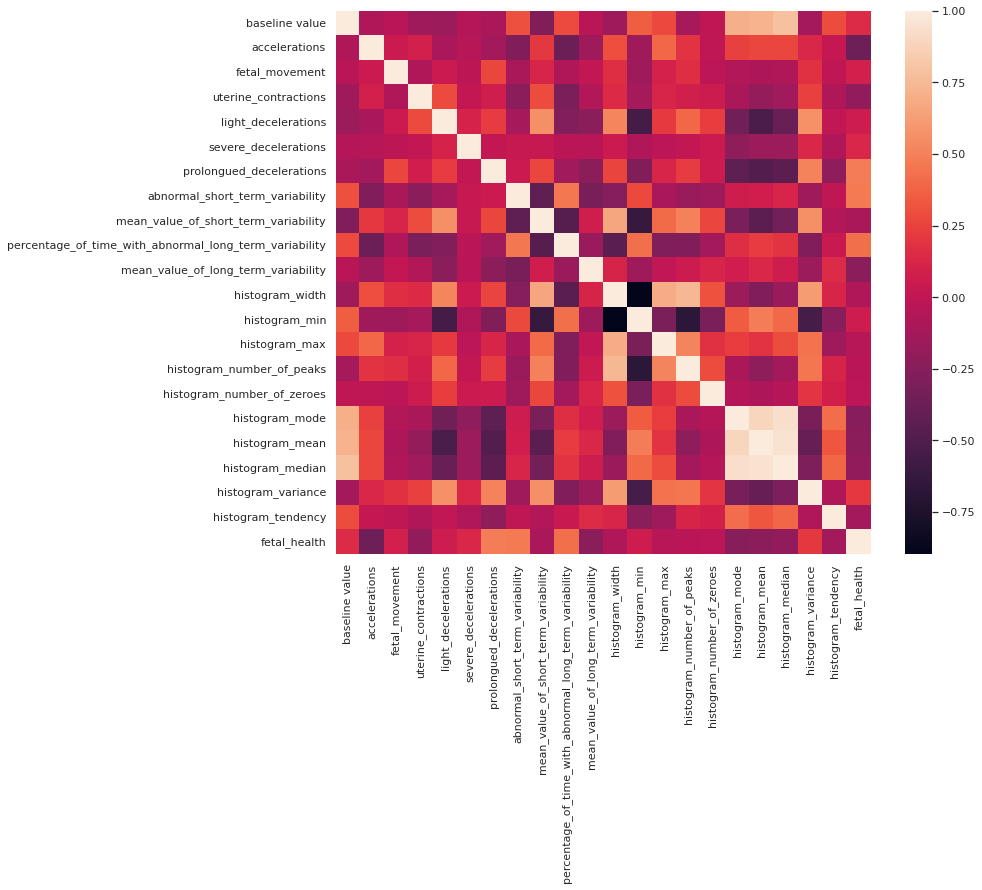

In [12]:
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix)
plt.show()

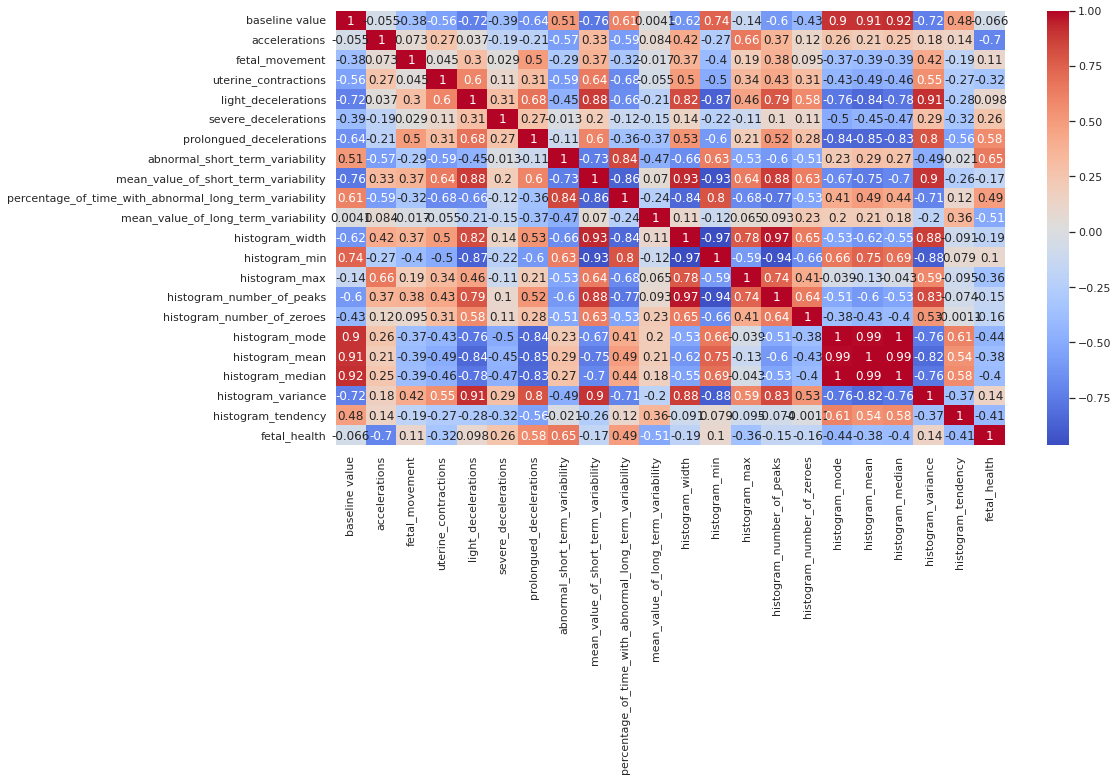

In [13]:
plt.figure(figsize=(15,8))
sns.set(font_scale=1)
sns.heatmap(corr_matrix.corr(), annot=True, cmap='coolwarm');

In [14]:
x = x.drop(['histogram_min','histogram_median','histogram_mode'], axis=1)

Training and Testing Dataset

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=30,random_state=0)

In [16]:
print("x_train shape is:",x_train.shape)

x_train shape is: (2096, 18)


In [17]:
print("x_test shape is:",x_test.shape)

x_test shape is: (30, 18)


In [18]:
print("y_train shape is:",y_train.shape)

y_train shape is: (2096,)


In [19]:
print("y_test shape is:",y_test.shape)

y_test shape is: (30,)


K Nearest Neighbours

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(x_train,y_train)

#Calculating Details
print('knn Model Train Score is : ' , knn.score(x_train, y_train))
print('knn Model Test Score is : ' , knn.score(x_test, y_test))
print('knn Classes are : ' , knn.classes_)#classes in prediction

knn Model Train Score is :  0.9012404580152672
knn Model Test Score is :  0.9666666666666667
knn Classes are :  [1. 2. 3.]


In [22]:
#Calculating Prediction
y_pred = knn.predict(x_test)
y_pred_prob = knn.predict_proba(x_test)
print('Predicted Value for knn model is : ' , y_pred[:10])
print('Prediction Probabilities Value for knn model is : ' , y_pred_prob[:10])

Predicted Value for knn model is :  [1. 1. 1. 1. 2. 1. 1. 1. 1. 2.]
Prediction Probabilities Value for knn model is :  [[1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [0.86666667 0.13333333 0.        ]
 [0.06666667 0.86666667 0.06666667]
 [1.         0.         0.        ]
 [0.93333333 0.         0.06666667]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [0.33333333 0.66666667 0.        ]]


In [23]:
from sklearn.metrics import accuracy_score
#Calculating Accuracy Score  : ((TP + TN) / float(TP + TN + FP + FN))
AccScore = accuracy_score(y_test, y_pred, normalize=False)
print('Accuracy Score is : ', AccScore)

Accuracy Score is :  29


In [24]:
from sklearn.metrics import f1_score
#Calculating F1 Score  : 2 * (precision * recall) / (precision + recall)
# f1_score(y_true, y_pred, labels=None, pos_label=1, average=’binary’, sample_weight=None)

F1Score = f1_score(y_test, y_pred, average='micro') #it can be : binary,macro,weighted,samples
print('F1 Score on testing data is : ', F1Score)

cm = confusion_matrix(y_test,y_pred)
print('Confusion Matrix -')
print(cm)

F1 Score on testing data is :  0.9666666666666667
Confusion Matrix -
[[23  0  0]
 [ 0  5  0]
 [ 1  0  1]]


In [25]:
print('Accuracy using K fold cross validation techinique -')
accuracies = cross_val_score(estimator=knn,X = x_train , y = y_train , cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy using K fold cross validation techinique -
Accuracy: 88.08 %
Standard Deviation: 2.25 %


Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
RandomForestClassifierModel = RandomForestClassifier(criterion = 'gini',n_estimators=100,max_depth=4,random_state=33) #criterion can be also : entropy 
RandomForestClassifierModel.fit(x_train, y_train)

#Calculating Details
print('RandomForestClassifierModel Train Score is : ' , RandomForestClassifierModel.score(x_train, y_train))
print('RandomForestClassifierModel Test Score is : ' , RandomForestClassifierModel.score(x_test, y_test))
print('RandomForestClassifierModel features importances are : ' , RandomForestClassifierModel.feature_importances_)
print('RandomForestClassifierModel Classes are : ' , RandomForestClassifierModel.classes_)#classes in prediction

RandomForestClassifierModel Train Score is :  0.920324427480916
RandomForestClassifierModel Test Score is :  0.9666666666666667
RandomForestClassifierModel features importances are :  [0.03644756 0.05420475 0.00794909 0.03049623 0.00612099 0.00031082
 0.07895348 0.18664895 0.16377029 0.1460419  0.04953221 0.02961838
 0.01162796 0.00425659 0.00081802 0.15236407 0.03579538 0.00504333]
RandomForestClassifierModel Classes are :  [1. 2. 3.]


In [28]:
#Calculating Prediction
y_pred = RandomForestClassifierModel.predict(x_test)
y_pred_prob = RandomForestClassifierModel.predict_proba(x_test)
print('Predicted Value for RandomForestClassifierModel is : ' , y_pred[:10])
print('Prediction Probabilities Value for RandomForestClassifierModel is : ' , y_pred_prob[:10])

Predicted Value for RandomForestClassifierModel is :  [1. 1. 1. 1. 2. 1. 1. 1. 1. 2.]
Prediction Probabilities Value for RandomForestClassifierModel is :  [[0.93064616 0.05939297 0.00996088]
 [0.95889382 0.0305069  0.01059928]
 [0.90756225 0.08086788 0.01156987]
 [0.46448722 0.44122406 0.09428872]
 [0.22172978 0.68360341 0.09466681]
 [0.95463654 0.04107496 0.0042885 ]
 [0.87040619 0.06233369 0.06726012]
 [0.92720265 0.06187167 0.01092568]
 [0.93877757 0.04177529 0.01944714]
 [0.43335215 0.48473346 0.08191439]]


In [29]:
from sklearn.metrics import accuracy_score
#Calculating Accuracy Score  : ((TP + TN) / float(TP + TN + FP + FN))
AccScore = accuracy_score(y_test, y_pred, normalize=False)
print('Accuracy Score is : ', AccScore)

Accuracy Score is :  29


In [30]:
from sklearn.metrics import f1_score
#Calculating F1 Score  : 2 * (precision * recall) / (precision + recall)
# f1_score(y_true, y_pred, labels=None, pos_label=1, average=’binary’, sample_weight=None)

F1Score = f1_score(y_test, y_pred, average='micro') #it can be : binary,macro,weighted,samples
print('F1 Score on testing data is : ', F1Score)

cm = confusion_matrix(y_test,y_pred)
print('Confusion Matrix -')
print(cm)

F1 Score on testing data is :  0.9666666666666667
Confusion Matrix -
[[23  0  0]
 [ 0  5  0]
 [ 1  0  1]]


In [31]:
print('Accuracy using K fold cross validation techinique -')
accuracies = cross_val_score(estimator=RandomForestClassifierModel,X = x_train , y = y_train , cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy using K fold cross validation techinique -
Accuracy: 91.08 %
Standard Deviation: 1.17 %


Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
DecisionTreeClassifierModel = DecisionTreeClassifier(criterion='gini',max_depth=2,random_state=33) #criterion can be entropy
DecisionTreeClassifierModel.fit(x_train, y_train)

#Calculating Details
print('DecisionTreeClassifierModel Train Score is : ' , DecisionTreeClassifierModel.score(x_train, y_train))#training score
print('DecisionTreeClassifierModel Test Score is : ' , DecisionTreeClassifierModel.score(x_test, y_test))#testing score
print('DecisionTreeClassifierModel Classes are : ' , DecisionTreeClassifierModel.classes_)#classes in prediction
print('DecisionTreeClassifierModel feature importances are : ' , DecisionTreeClassifierModel.feature_importances_)

DecisionTreeClassifierModel Train Score is :  0.8826335877862596
DecisionTreeClassifierModel Test Score is :  0.9333333333333333
DecisionTreeClassifierModel Classes are :  [1. 2. 3.]
DecisionTreeClassifierModel feature importances are :  [0.         0.         0.         0.         0.         0.
 0.         0.         0.49462716 0.12079252 0.         0.
 0.         0.         0.         0.38458032 0.         0.        ]


In [34]:
#Calculating Prediction
y_pred = DecisionTreeClassifierModel.predict(x_test)
y_pred_prob = DecisionTreeClassifierModel.predict_proba(x_test)
print('Predicted Value for DecisionTreeClassifierModel is : ' , y_pred[:10])
print('Prediction Probabilities Value for DecisionTreeClassifierModel is : ' , y_pred_prob[:10])

Predicted Value for DecisionTreeClassifierModel is :  [1. 1. 1. 2. 2. 1. 1. 1. 1. 2.]
Prediction Probabilities Value for DecisionTreeClassifierModel is :  [[0.93423479 0.05654579 0.00921942]
 [0.93423479 0.05654579 0.00921942]
 [0.93423479 0.05654579 0.00921942]
 [0.30721003 0.61442006 0.07836991]
 [0.30721003 0.61442006 0.07836991]
 [0.93423479 0.05654579 0.00921942]
 [0.93423479 0.05654579 0.00921942]
 [0.93423479 0.05654579 0.00921942]
 [0.93423479 0.05654579 0.00921942]
 [0.30721003 0.61442006 0.07836991]]


In [35]:
from sklearn.metrics import accuracy_score

#Calculating Accuracy Score  : ((TP + TN) / float(TP + TN + FP + FN))
AccScore = accuracy_score(y_test, y_pred, normalize=False)
print('Accuracy Score is : ', AccScore)

Accuracy Score is :  28


In [36]:
from sklearn.metrics import f1_score
#Calculating F1 Score  : 2 * (precision * recall) / (precision + recall)
# f1_score(y_true, y_pred, labels=None, pos_label=1, average=’binary’, sample_weight=None)

F1Score = f1_score(y_test, y_pred, average='micro') #it can be : binary,macro,weighted,samples
print('F1 Score on testing data is : ', F1Score)

cm = confusion_matrix(y_test,y_pred)
print('Confusion Matrix -')
print(cm)

F1 Score on testing data is :  0.9333333333333333
Confusion Matrix -
[[22  1  0]
 [ 0  5  0]
 [ 0  1  1]]


In [37]:
print('Accuracy using K fold cross validation techinique -')
accuracies = cross_val_score(estimator=DecisionTreeClassifierModel,X = x_train , y = y_train , cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy using K fold cross validation techinique -
Accuracy: 88.26 %
Standard Deviation: 1.71 %


Naive Bayes Classifier

In [38]:
from sklearn.naive_bayes import GaussianNB

In [39]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)

#Calculating Details
print('Gaussian Naives Bayes Classifier model Train Score is : ' , gnb.score(x_train, y_train))
print('Gaussian Naives Bayes Classifier model Test Score is : ' , gnb.score(x_test, y_test))
print('Gaussian Naives Bayes Classifier model Classes are : ' , gnb.classes_)#classes in prediction

Gaussian Naives Bayes Classifier model Train Score is :  0.8220419847328244
Gaussian Naives Bayes Classifier model Test Score is :  0.9
Gaussian Naives Bayes Classifier model Classes are :  [1. 2. 3.]


In [40]:
#Calculating Prediction
y_pred = gnb.predict(x_test)
y_pred_prob = gnb.predict_proba(x_test)
print('Predicted Value for Gaussian Naives Bayes Classifier model is : ' , y_pred[:10])
print('Prediction Probabilities Value for Gaussian Naives Bayes Classifier model is : ' , y_pred_prob[:10])

Predicted Value for Gaussian Naives Bayes Classifier model is :  [1. 1. 2. 2. 2. 1. 1. 1. 1. 2.]
Prediction Probabilities Value for Gaussian Naives Bayes Classifier model is :  [[9.92324152e-01 7.63252407e-03 4.33238765e-05]
 [9.99999933e-01 7.61122125e-09 5.96122862e-08]
 [2.88672772e-01 7.08770141e-01 2.55708747e-03]
 [5.20554238e-03 9.94770753e-01 2.37041421e-05]
 [1.63551042e-07 9.99987757e-01 1.20790385e-05]
 [9.99981810e-01 1.81650186e-05 2.49403635e-08]
 [9.03906363e-01 1.47390214e-06 9.60921633e-02]
 [9.93305605e-01 6.63178082e-03 6.26143816e-05]
 [9.99999997e-01 8.87441624e-18 2.66526218e-09]
 [2.77433043e-01 7.22311118e-01 2.55838405e-04]]


In [41]:
from sklearn.metrics import accuracy_score

#Calculating Accuracy Score  : ((TP + TN) / float(TP + TN + FP + FN))
AccScore = accuracy_score(y_test, y_pred, normalize=False)
print('Accuracy Score is : ', AccScore)

Accuracy Score is :  27


In [42]:
from sklearn.metrics import f1_score
#Calculating F1 Score  : 2 * (precision * recall) / (precision + recall)
# f1_score(y_true, y_pred, labels=None, pos_label=1, average=’binary’, sample_weight=None)

F1Score = f1_score(y_test, y_pred, average='micro') #it can be : binary,macro,weighted,samples
print('F1 Score on testing data is : ', F1Score)

cm = confusion_matrix(y_test,y_pred)
print('Confusion Matrix -')
print(cm)

F1 Score on testing data is :  0.9
Confusion Matrix -
[[20  2  1]
 [ 0  5  0]
 [ 0  0  2]]


In [43]:
print('Accuracy using K fold cross validation techinique -')
accuracies = cross_val_score(estimator=gnb,X = x_train , y = y_train , cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy using K fold cross validation techinique -
Accuracy: 81.78 %
Standard Deviation: 2.63 %


Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression

In [59]:
#feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [51]:
lr = LogisticRegression(random_state=0, solver="liblinear")
lr.fit(X_train, y_train)

#Calculating Details
print('Logistic regression model Train Score is : ' , lr.score(X_train, y_train))
print('Logistic regression model Test Score is : ' , lr.score(X_test, y_test))
print('Logistic regression model Classes are : ' , lr.classes_)#classes in prediction

Logistic regression model Train Score is :  0.9007633587786259
Logistic regression model Test Score is :  0.9333333333333333
Logistic regression model Classes are :  [1. 2. 3.]


In [53]:
#Calculating Prediction
y_pred = lr.predict(X_test)
y_pred_prob = lr.predict_proba(X_test)
print('Predicted Value for Logistic regression model is : ' , y_pred[:10])
print('Prediction Probabilities Value for Logistic regression model is : ' , y_pred_prob[:10])

Predicted Value for Logistic regression model is :  [1. 1. 1. 2. 2. 1. 1. 1. 1. 2.]
Prediction Probabilities Value for Logistic regression model is :  [[9.81467710e-01 1.78993028e-02 6.32987389e-04]
 [9.93421526e-01 6.29864915e-03 2.79825208e-04]
 [9.54601487e-01 3.16069798e-02 1.37915333e-02]
 [3.00280759e-01 6.49875394e-01 4.98438466e-02]
 [2.30164346e-01 6.83334050e-01 8.65016042e-02]
 [9.97244456e-01 2.49229970e-03 2.63244213e-04]
 [9.64663560e-01 2.57706292e-02 9.56581098e-03]
 [9.59137896e-01 4.06033091e-02 2.58794976e-04]
 [9.84394509e-01 1.55303342e-02 7.51564059e-05]
 [4.12429038e-01 5.87199807e-01 3.71155516e-04]]


In [54]:
from sklearn.metrics import accuracy_score

#Calculating Accuracy Score  : ((TP + TN) / float(TP + TN + FP + FN))
AccScore = accuracy_score(y_test, y_pred, normalize=False)
print('Accuracy Score is : ', AccScore)

Accuracy Score is :  28


In [55]:
from sklearn.metrics import f1_score
#Calculating F1 Score  : 2 * (precision * recall) / (precision + recall)
# f1_score(y_true, y_pred, labels=None, pos_label=1, average=’binary’, sample_weight=None)

F1Score = f1_score(y_test, y_pred, average='micro') #it can be : binary,macro,weighted,samples
print('F1 Score on testing data is : ', F1Score)

cm = confusion_matrix(y_test,y_pred)
print('Confusion Matrix -')
print(cm)

F1 Score on testing data is :  0.9333333333333333
Confusion Matrix -
[[22  1  0]
 [ 0  5  0]
 [ 1  0  1]]


In [57]:
print('Accuracy using K fold cross validation techinique -')
accuracies = cross_val_score(estimator=lr,X = x_train , y = y_train , cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy using K fold cross validation techinique -
Accuracy: 86.93 %
Standard Deviation: 1.87 %


Support Vector Machine(SVM)

In [58]:
from sklearn.svm import SVC

In [60]:
#feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [71]:
svm = SVC(kernel='poly', degree=8)#using default hyperparameters
svm.fit(X_train, y_train)

#Calculating Details
print('SVM Train Score is : ' , svm.score(X_train, y_train))
print('SVM Test Score is : ' , svm.score(X_test, y_test))
print('SVM Classes are : ' , svm.classes_)#classes in prediction

SVM Train Score is :  0.913645038167939
SVM Test Score is :  0.9
SVM Classes are :  [1. 2. 3.]


In [72]:
#Calculating Prediction
y_pred = svm.predict(X_test)
y_pred_prob = svm.predict_proba(X_test)
print('Predicted Value for Logistic regression model is : ' , y_pred[:10])
print('Prediction Probabilities Value for Logistic regression model is : ' , y_pred_prob[:10])

AttributeError: ignored

In [73]:
from sklearn.metrics import accuracy_score

#Calculating Accuracy Score  : ((TP + TN) / float(TP + TN + FP + FN))
AccScore = accuracy_score(y_test, y_pred, normalize=False)
print('Accuracy Score is : ', AccScore)

Accuracy Score is :  27


In [74]:
from sklearn.metrics import f1_score
#Calculating F1 Score  : 2 * (precision * recall) / (precision + recall)
# f1_score(y_true, y_pred, labels=None, pos_label=1, average=’binary’, sample_weight=None)

F1Score = f1_score(y_test, y_pred, average='micro') #it can be : binary,macro,weighted,samples
print('F1 Score on testing data is : ', F1Score)

cm = confusion_matrix(y_test,y_pred)
print('Confusion Matrix -')
print(cm)

F1 Score on testing data is :  0.9
Confusion Matrix -
[[23  0  0]
 [ 3  2  0]
 [ 0  0  2]]


In [75]:
print('Accuracy using K fold cross validation techinique -')
accuracies = cross_val_score(estimator=svm,X = x_train , y = y_train , cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy using K fold cross validation techinique -
Accuracy: 87.45 %
Standard Deviation: 1.59 %


In [76]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred)) #accuracy w/o k fold cross validataion

              precision    recall  f1-score   support

         1.0       0.88      1.00      0.94        23
         2.0       1.00      0.40      0.57         5
         3.0       1.00      1.00      1.00         2

    accuracy                           0.90        30
   macro avg       0.96      0.80      0.84        30
weighted avg       0.91      0.90      0.88        30

